In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
import warnings
warnings.filterwarnings('ignore')
import scipy.stats

microsoft_df=pd.read_csv('Microsoft_Data.csv')
microsoft_df

microsoft_df['HasDetections'].value_counts()
microsoft_df['OsBuild'].value_counts()
microsoft_df.columns
#microsoft_df.apply(pd.Series.value_counts) ---> to get values counts for all columns
microsoft_df['OsBuild']=microsoft_df['OsBuild'].astype('object')
microsoft_df['HasDetections'].dtype

microsoft_df.isnull().sum();

missing_values_df = pd.DataFrame({'column_name':microsoft_df.columns,
                                  'missing_value_count':microsoft_df.isnull().sum(),
                                  'missing_value_percent':microsoft_df.isnull().sum()/microsoft_df.shape[0]*100})

missing_values_df
missing_values_df=missing_values_df.sort_values(by='missing_value_percent',ascending=False)
missing_values_df

drop_columns=list(missing_values_df[missing_values_df['missing_value_percent']>50]['column_name'])

microsoft_df.drop(columns=drop_columns,inplace=True)
microsoft_df.shape

microsoft_int_float = [i for i in microsoft_df.columns if microsoft_df[i].dtype == 'int64' or microsoft_df[i].dtype == 'float64']
len(microsoft_int_float)
drop_columns

microsoft_object = [i for i in microsoft_df.columns if microsoft_df[i].dtype == object]
microsoft_object
len(microsoft_object)
microsoft_df.shape
length = len(microsoft_object) + len(microsoft_int_float)
length

for i in microsoft_int_float:
    microsoft_df[i].fillna(microsoft_df[i].mean(),inplace=True)
for i in microsoft_int_float:
    microsoft_df[i].fillna(microsoft_df[i].mode()[0],inplace=True)
    
len(microsoft_df.columns)

crosstab = pd.crosstab(microsoft_df['OsBuild'],microsoft_df['HasDetections'])
crosstab # gives observed table 
                
result= scipy.stats.chi2_contingency(crosstab)
result

#output : 1 - chisquare statistc value ////  2 - p_value //// 3 - degreess of freedom ///// 4 - expected table
len(microsoft_df.columns)
microsoft_df.shape
drop_columns

y=microsoft_df['HasDetections']
microsoft_df.drop(columns='HasDetections',inplace=True)
y
microsoft_df.isnull().sum()
microsoft_df.shape

(56756, 75)

In [2]:
import pandas as pd
import numpy as np  #has all numerical functions
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


auto_mobile_df=pd.read_csv('auto-mpg.data',delim_whitespace=True,header=None,usecols=[0,1],names=['mpg','cylinders']
                           ,dtype={'mpg':np.float64,'cylinders':'category'})
auto_mobile_df

sns.boxplot(x=auto_mobile_df['cylinders'],y=auto_mobile_df['mpg'],showmeans=True)
plt.figure(figsize=(20,10))

plt.show()

#Fitting the ANOVA Model
model =smf.ols(formula='mpg ~ cylinders', data=auto_mobile_df) #(ordinary list squares)
results=model.fit()
print(results.summary()) #f-statistic and p value is what we ned to give importance:


<Figure size 640x480 with 1 Axes>

<Figure size 2000x1000 with 0 Axes>

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     172.6
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           3.68e-85
Time:                        11:04:56   Log-Likelihood:                -1180.8
No. Observations:                 398   AIC:                             2372.
Df Residuals:                     393   BIC:                             2392.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.5500      2.366      8.

In [3]:
#p-value assignement for all colums where dtype is object
import scipy.stats
microsoft_df
microsoft_object = [col for col in microsoft_df.columns if microsoft_df[col].dtype == 'O']
microsoft_object

p_values_list=[]
for col in microsoft_object:
    crosstab = pd.crosstab(microsoft_df[col],y)
    result = scipy.stats.chi2_contingency(crosstab)
    p_values_list.append(result[1])

p_values_list

new_df = pd.DataFrame({'column_name':microsoft_object,
                        'p-value':p_values_list})
new_df

new_df=new_df.sort_values(by='p-value',ascending=False)
new_df


,column_name,p-value
1,ProductName,6.701547e-01
7,OsVer,5.191060e-01
0,MachineIdentifier,4.980265e-01
27,Census_FlightRing,2.174158e-01
5,Platform,1.531325e-02
14,Census_DeviceFamily,2.054026e-03
25,Census_GenuineStateName,1.883395e-05
11,SkuEdition,3.911500e-06
15,Census_PrimaryDiskTypeName,2.541452e-13
24,Census_OSWUAutoUpdateOptionsName,1.077721e-14


In [4]:
cols_to_drop=[]

for col in microsoft_df.columns:
    if microsoft_df[col].nunique()==microsoft_df.shape[0] or microsoft_df[col].nunique()==1:
        cols_to_drop.append(col)
        
cols_to_drop

microsoft_df.drop(columns=cols_to_drop,inplace=True)


for col in microsoft_df.columns:
    if col!='Census_SystemVolumeTotalCapacity':
        microsoft_df[col]=microsoft_df[col].astype(object)
        
microsoft_df['Census_OSBuildRevision'].nunique()


210

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(microsoft_df,y,test_size=0.2,random_state=26)
for col in X_train.columns:
        if X_train[col].dtype==object:
            X_train[col]=X_train[col].fillna(X_train[col].mode()[0]).astype(object)
            X_test[col]=X_test[col].fillna(X_train[col].mode()[0]).astype(object)
        else:
            X_train[col]=X_train[col].fillna(X_train[col].mean())
            X_test[col]=X_test[col].fillna(X_train[col].mean())
            
X_train
Y_train

X_test
Y_test

X_train.isnull().sum()

ProductName                                0
EngineVersion                              0
AppVersion                                 0
AvSigVersion                               0
RtpStateBitfield                           0
                                          ..
Census_IsTouchEnabled                      0
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
Wdft_RegionIdentifier                      0
Length: 71, dtype: int64

In [6]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoderExt()

for col in X_train.columns:
    if(X_train[col].dtype==object):
        le.fit(X_train[col])
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])
X_train
        


,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
52897,2,33,33,2837,7,2,1280,6,5,2,...,3,125,8520,2,3,2,2,3,3,16
49684,2,32,61,2388,7,2,1280,6,5,2,...,3,125,8520,2,3,2,2,3,3,16
5485,2,33,33,2477,7,2,1280,6,5,2,...,3,125,8520,2,3,2,2,3,3,16
25525,2,32,33,2235,7,2,1280,6,5,2,...,3,125,8520,2,3,2,2,3,3,16
53026,2,32,30,2412,7,2,1280,6,5,2,...,3,125,8520,2,3,2,2,3,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10177,2,22,20,1068,7,2,1280,6,5,2,...,3,125,8520,2,3,2,2,3,3,16
42416,2,33,58,2649,7,2,1280,6,5,2,...,3,125,8520,2,3,2,2,3,3,16
55046,2,31,30,1813,7,2,1280,6,5,2,...,3,125,8520,2,3,2,2,3,3,16
30014,2,33,33,2681,7,2,1280,6,5,2,...,3,125,8520,2,3,2,2,3,3,16


In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)


comp_df = pd.DataFrame({'Actual_values': Y_test,'Predicted':y_pred})
comp_df

,Actual_values,Predicted
34829,1,0
37842,0,0
9474,0,0
31207,1,1
27796,1,1
...,...,...
38710,1,1
5879,1,0
44182,0,1
40895,0,1


In [9]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_pred_proba

array([0.46352667, 0.44199251, 0.47655016, ..., 0.53967115, 0.62125095,
       0.61149554])

In [10]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
confusion_matrix(Y_test,y_pred)
recall_score(Y_test,y_pred)
precision_score(Y_test,y_pred)

f1_score(Y_test,y_pred)

0.5405759162303665

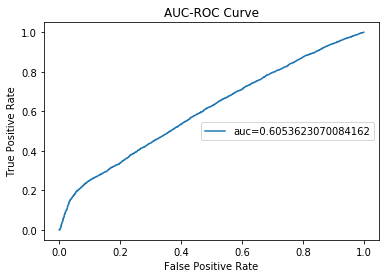

In [11]:
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR

auc = roc_auc_score(Y_test,y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=5)
plt.show()


In [12]:
fpr,tpr,thresholds

comp_df = pd.DataFrame({'Thresholds':thresholds,
                         'FPR':fpr,
                          'TPR':tpr})
comp_df

,Thresholds,FPR,TPR
0,1.735273,0.000000,0.000000
1,0.735273,0.000178,0.000000
2,0.717045,0.000356,0.000000
3,0.706939,0.000356,0.000872
4,0.705108,0.000534,0.000872
...,...,...,...
5444,0.334461,0.999110,0.999128
5445,0.327188,0.999110,0.999651
5446,0.319926,0.999644,0.999651
5447,0.309703,0.999644,1.000000


In [13]:
#if there are same recordds with no new data in train data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train_city = ['hyd','chn','del','bang','hyd','chn','hyd','bang']
test_city = ['hyd','chn','del','bang']

le.fit_transform(train_city)
le.transform(test_city)

array([3, 1, 2, 0], dtype=int64)

In [15]:
#if there are  recordds with new data in train data we will use LabelEncoderExt class
from sklearn.preprocessing import LabelEncoder

le=LabelEncoderExt()

train_city = ['hyd','chn','del','bang','hyd','chn','hyd','bang']
test_city = ['hyd','chn','del','bang','mumbai','bang','kolkata','kolkata','up']

le.fit(train_city)
le.transform(test_city)

array([4, 2, 3, 1, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
from sklearn.naive_bayes import MultinomialNB
multnb = MultinomialNB()

multnb.fit(X_train,Y_train)
y_pred = multnb.predict(X_test)


comp_df = pd.DataFrame({'Actual_values': Y_test,'Predicted':y_pred})
comp_df

,Actual_values,Predicted
34829,1,0
37842,0,0
9474,0,0
31207,1,0
27796,1,0
...,...,...
38710,1,0
5879,1,1
44182,0,1
40895,0,0


In [17]:
y_pred_proba = multnb.predict_proba(X_test)[::,1]
y_pred_proba

array([0.00000000e+000, 1.16678305e-189, 0.00000000e+000, ...,
       1.00000000e+000, 0.00000000e+000, 1.12173662e-180])

In [18]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
confusion_matrix(Y_test,y_pred)
recall_score(Y_test,y_pred)
precision_score(Y_test,y_pred)

f1_score(Y_test,y_pred)

0.464984406010774

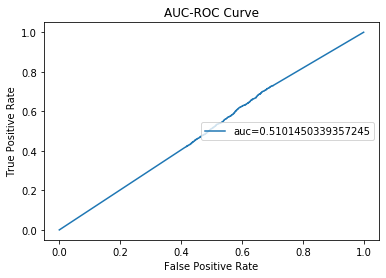

In [20]:
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR

auc = roc_auc_score(Y_test,y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=5)
plt.show()
